In [1]:
import sys
sys.path.append("../")
from feature_search import fsearch

In [2]:
im1_name = "../images/trailmix_parent_crop.jpg"
im2_name = "../images/trailmix_child.jpg"

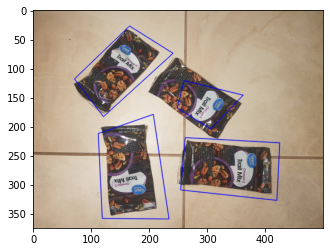

In [3]:
rois, images = fsearch(im1_name, im2_name)